In [33]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [34]:
credit_data=pd.read_csv("/content/tested (1).csv")
credit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
credit_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [10]:

credit_data.shape

(418, 12)

In [11]:
credit_data.size

5016

In [12]:
credit_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
credit_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
credit_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
credit_data.drop(['Fare'] , axis=1 , inplace=True)

In [17]:
imputer = SimpleImputer(strategy='mean')
credit_data[['Age']] = imputer.fit_transform(credit_data[['Age']])

In [18]:
credit_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.50000,0,0,Q
1,1,3,female,47.00000,1,0,S
2,0,2,male,62.00000,0,0,Q
3,0,3,male,27.00000,0,0,S
4,1,3,female,22.00000,1,1,S
...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,S
414,1,1,female,39.00000,0,0,C
415,0,3,male,38.50000,0,0,S
416,0,3,male,30.27259,0,0,S


In [19]:
label_encoder = LabelEncoder()
credit_data['Sex'] = label_encoder.fit_transform(credit_data['Sex'])
credit_data['Embarked'] = label_encoder.fit_transform(credit_data['Embarked'])

In [20]:
X = credit_data.drop(columns=['Survived'])
y = credit_data['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
credit_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,34.50000,0,0,1
1,1,3,0,47.00000,1,0,2
2,0,2,1,62.00000,0,0,1
3,0,3,1,27.00000,0,0,2
4,1,3,0,22.00000,1,1,2
...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,2
414,1,1,0,39.00000,0,0,0
415,0,3,1,38.50000,0,0,2
416,0,3,1,30.27259,0,0,2


In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [26]:
new_data = pd.DataFrame({
    'Pclass': [3 , 3],
    'Sex': [1 , 0],  # 0 for female, 1 for male
    'Age': [34.5000 , 47.0000],
    'SibSp': [0  ,1],
    'Parch': [0 , 0],
    'Embarked':[1 , 2]  # 0 for 'C', 2 for 'S'
})
predictions = model.predict(new_data)

for i, prediction in enumerate(predictions):
    print(f"Passenger {i+1} prediction: {'Survived' if prediction == 1 else 'Not Survived'}")

Passenger 1 prediction: Not Survived
Passenger 2 prediction: Survived


In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


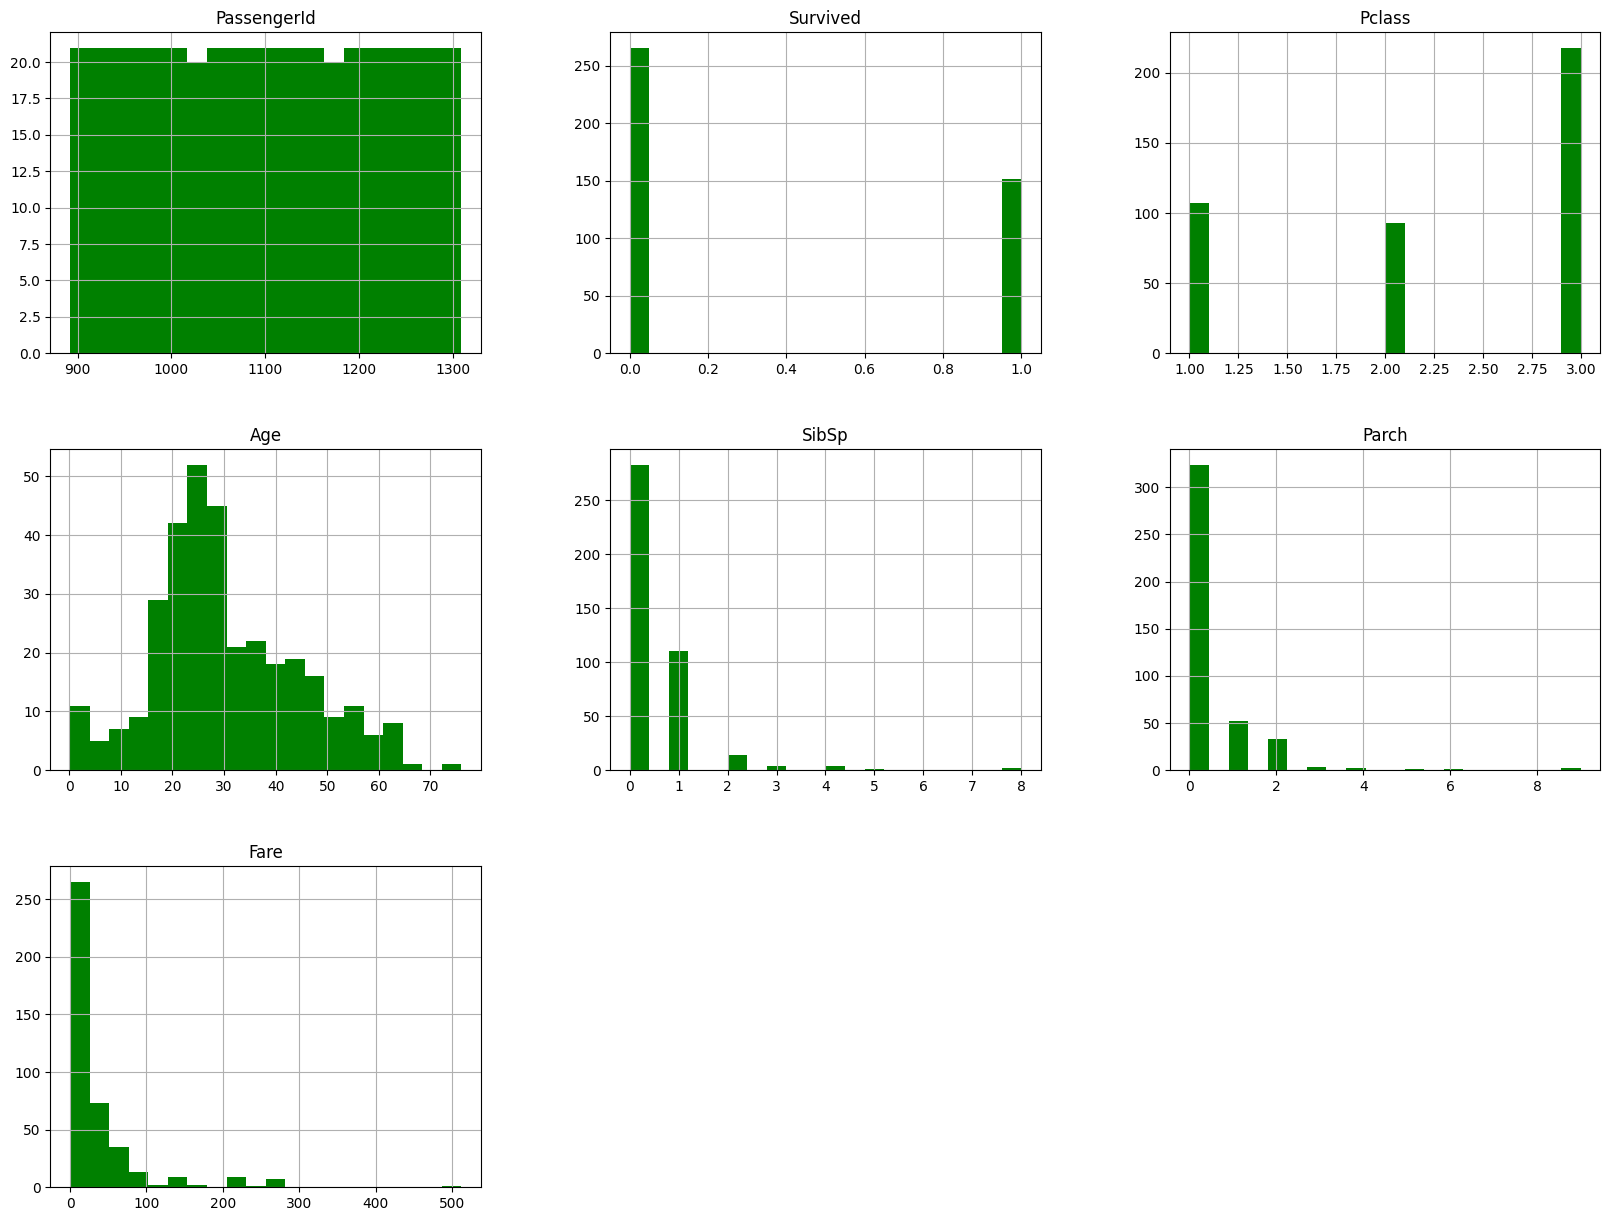

In [35]:
credit_data.hist(bins=20, figsize=(20, 15) , color = "green")
plt.show()